In [1]:
from codes_RF.dpqc_models import DeepQC

the folowing are the dataset accessable:
 train_input: (9260, 424, 1)
 train_label: (9260, 1)
 test_input: (3600, 424, 1)
 test_label: (3600, 1)


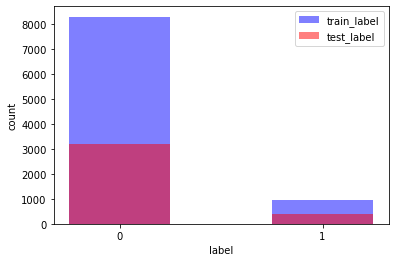

In [2]:
my_deepqc = DeepQC()                            #initialize the class
my_deepqc.load_data(label_keyword=["X5"])       #load the data into the class object (default; label_keyword="X5")
my_deepqc.stats()                               #plot the data distribution    

In [3]:
my_deepqc.add_shift(shift_factor=5)        #augment the data (default; noise_factor=40)
my_deepqc.add_scaling(scaling_factor=0.2)   #augment the data (default; low_pass=0.2)
my_deepqc.add_noise(noise_factor=0.01)      #augment the data (default; noise_factor=0.05)

the folowing are the dataset accessable:
 train_input: (10217, 424, 1)
 train_label: (10217, 1)
 test_input: (3600, 424, 1)
 test_label: (3600, 1)
the folowing are the dataset accessable:
 train_input: (11174, 424, 1)
 train_label: (11174, 1)
 test_input: (3600, 424, 1)
 test_label: (3600, 1)
the folowing are the dataset accessable:
 train_input: (20434, 424, 1)
 train_label: (20434, 1)
 test_input: (3600, 424, 1)
 test_label: (3600, 1)


In [ ]:
kernel_sizes = [5, 7]
lr = [1e-4, 1e-5]
decay = [1e-6, 1e-6]
batch_size = [256, 512]
initializers = ['he_uniform']   #'zeros', 'ones', 'random_uniform', 'random_normal', 'truncated_normal', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform', 'lecun_uniform', 'lecun_normal'

exit_all_loop = False
for kernel_size in kernel_sizes:
    if exit_all_loop:
        break
    for init in initializers:
        if exit_all_loop:
            break
        for LR in zip(lr, decay):
            if exit_all_loop:
                break
            for batch in batch_size:
                print("*"*100)
                print("="*100)
                print("initializer:", init, "-- learning rate:", LR[0], "-- decay:", LR[1], "-- batch size:", batch, "-- kernel_size:", kernel_size)
                print("="*100)
                print("*"*100)
                
                acc = my_deepqc.train(model_type="unet", initializer=init, kernel_size = kernel_size, epochs= 100, batch_size= batch, verbose= 1, lr= LR[0], decay= LR[1],
                    plot_history= True, patience= 3, min_delta= 0.001, target_accuracy = 0.85)
                if acc > 0.97:
                    exit_all_loop = True
                    break

Loaded model:  unet_0.966_he_uniform_kernelsize_5_lr_0.0001.h5
Epoch 1/1000
80/80 [==============================] - 23s 246ms/step - loss: 0.0345 - accuracy: 0.9546 - f1_score: 0.8802 - val_loss: 0.0365 - val_accuracy: 0.9517 - val_f1_score: 0.8117
Epoch 2/1000
80/80 [==============================] - 16s 202ms/step - loss: 0.0263 - accuracy: 0.9651 - f1_score: 0.9078 - val_loss: 0.0252 - val_accuracy: 0.9650 - val_f1_score: 0.8421
Epoch 3/1000
80/80 [==============================] - 16s 203ms/step - loss: 0.0246 - accuracy: 0.9675 - f1_score: 0.9141 - val_loss: 0.0251 - val_accuracy: 0.9667 - val_f1_score: 0.8485
Epoch 4/1000
80/80 [==============================] - 16s 200ms/step - loss: 0.0244 - accuracy: 0.9683 - f1_score: 0.9161 - val_loss: 0.0298 - val_accuracy: 0.9608 - val_f1_score: 0.8374
Epoch 5/1000
80/80 [==============================] - 16s 201ms/step - loss: 0.0207 - accuracy: 0.9732 - f1_score: 0.9294 - val_loss: 0.0274 - val_accuracy: 0.9628 - val_f1_score: 0.8354
Ep

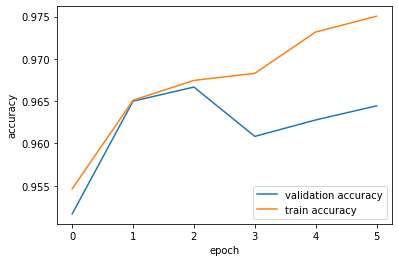

/Users/sina/anaconda3/envs/mlp/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


0.964

In [5]:
my_deepqc.train(model_type="pre-unet", kernel_size = 7, epochs= 1000, batch_size= 256, verbose= 1, lr= 1e-4, decay= 1e-6,
                plot_history= True, patience= 3, min_delta= 0.0001, target_accuracy = 0.94, initializer='he_uniform')

In [6]:
my_deepqc.model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 424, 1)]             0         []                            
                                                                                                  
 conv1d_14 (Conv1D)          (None, 424, 32)              192       ['input_2[0][0]']             
                                                                                                  
 conv1d_15 (Conv1D)          (None, 424, 32)              5152      ['conv1d_14[0][0]']           
                                                                                                  
 max_pooling1d_3 (MaxPoolin  (None, 212, 32)              0         ['conv1d_15[0][0]']           
 g1D)                                                                                       

In [ ]:
import os
import obspy
import matplotlib.pyplot as plt

station = "CRLN"
range = [280, 300]

all = os.listdir("DATA/RF/")
all = [i for i in all if i.endswith(".pkl")]
all = [i for i in all if station in i]
tr = obspy.Stream()
for i in all:
    st = obspy.read("DATA/RF/"+i).select(channel="RFR")

    if st[0].stats.baz > range[0] and st[0].stats.baz < range[1]:
        if st[0].stats.snr > 1:
            print(i, st[0].stats.baz)
            tr += st
tr.stack()
tr.plot()
